# Decision Trees and Diabetes Prediction
### Table of Contents

1. [Abstract](#abstract)
2. [Background](#background)
    1. [Applications of decision trees](#bgapplication)
    2. [Basic structure](#bgbasic)
    3. [Building Strategy](#bgbuilding)
    4. [Metrics and evaluation methods](#bgmetrics)
    5. [Implementation Starategy](#bgimplementation)
3. [Main Activity : Making the tree](#main)
    1. [Dividing data set into training and testing set](#dividing)  
    2. [Checking purity](#puritycheck)
    3. [Calssify Training Sample](#classifytraining)
    4. [Getting Possible splits of data](#getsplits)
    5. [Getting the best split](#getbestsplits)
    6. [Build Tree](#buildtree)
    7. [Classify new instances](#classifynew)
4. [Review Questions](#review)
    1. [Question 1](#rq1)
    2. [Question 2](#rq2)
    3. [Question 3](#rq3)
    4. [Question 4](#rq4)
    5. [Question 5](#rq5)
    6. [Question 6](#rq6)
    7. [Question 7](#rq7)
    8. [Question 8](#rq8)
    9. [Question 9](#rq9)
    10. [Question 10](#rq10)
5. [References](#ref)
    

 ## Abstract
 <a id="abstract"></a>

Decision tree is a supervised  machine learning tool that helps in classification through regression of categorical and numerical data.  Decision trees are often used because they are not as computationally heavy like deep neural networks , are a white box model making them easier to use and don’t need a significant amount of data preprocessing or curation. They provide a way to visualize and rank the hierarchy of the features in a data set and are used in data mining and modeling real life decision processes. 

Although not the most robust classification model, decision trees provide a means of visualizing and classifying data, and are a useful classification model. 

The intent of the project is to introduce the technique of constructing decision trees. After going through this activity one should :

- Understand the structure and components of decision trees
- Understand the different possible regression processes 
- Be able to construct and apply a decision tree to a dataset.

While going through this activity, we will build a generic API of a decision tree that can be applied to different compatible datasets. In this activity, we will experiment with two datasets: Iris and Diabetes classification. In both cases, we have numeric features which we will use to classify our instances.


 ## Background
 <a id="background"></a>

### Basic Structure
<a id="bgbasic"></a>

A decision tree like all trees is comprised of edges and nodes - the two types of nodes that exist are leaf nodes and interior nodes. 

**Interior Node**

An interior/non-leaf node in a decision tree is associated with a question regarding a feature of the data. This question is usually a comparison or a boolean check depending on type of the data. Depending on answer to the question, we move further down the tree to its child nodes and keep repeating the process till we reach a leaf node. 

**Edges**

An edge in a decision tree corresponds to answer that is asked by the interior node. This edge takes us from one question to either another question (interior node) or a classification (leaf node).

**Leaf Node**   

A leaf node in a decision tree is associated with the classification/ label of our tree. These values in our decision tree are always discrete - when reached a leaf node, the classification process comes to an end.


### Building Strategy
<a id="bgbuilding"></a>

The actual construction of a tree is based on selecting a feature and deciding a threshold label for the feature (numeric data) or a value for the feature (categorical data). This is what makes up our question for an interior node. We keep selecting features and splitting our data for children nodes until attributes are available or data is classified.

Our above strategy gives rise to a few important questions:  

- How long do we keep splitting?
- How do we know what feature to split based on, or what should the threshold be?  

We can dictate how long we keep splitting based on different metrics; in most cases, it is hard to achieve the perfect classification of data. One way is to experiment with different number of splits and see the performance of our tree, or to set a limit on how deep our tree can be.  

How we chose what feature to split based on depend on a few different computations, that are discussed below


### Metrics and Evaluation methods
<a id="bgmetrics"></a>

There are different algorithms that can be used to determine how good any split is based on.  Some of them are : Gini , Information gain and variance reduction.  

#### Gini impurity  
To understand gini we will first need to understand what purity is. It can be defined as :   

**Purity** : we can define purity as a proportion of labels that belong to any one class in the data. So a dataset that has labels of only one type would be 100% pure. If a datset has equal number of instances from different labels, it would be 100% impure.  


In the simplest terms gini impurity is the cumilative probability of being incorrect on both sides of our split. It is calculated by summing the probability of  the scenario where we randomly pick an instance from our splits and randomly classify it as one of our possible class labels and sum up where we are incorrect.
It is given mathematically by :
\begin{equation*}
\left( \sum_{i=1}^C p(i)* (1-p(i))  \right) 
\end{equation*}
Where C are the number possible labels, and p(i) is the probability of that label in the dataset.
After calculating this impurity for all the splits we would want to pick the split that has the least gini impurity.


#### Information gain and Entropy  

As the name suggests, in this algorithm we try to maximize the information that we gain through any split of the data.   We calculate this by maximizing the difference between the information we currently have and the information we will have following a split. This  measure of information is done through entropy.  
Entropy is a measure of homogeneity or randomness in a sample. The higher the entropy, the more random a subset, meaning we know  have lesser information on the subset. 

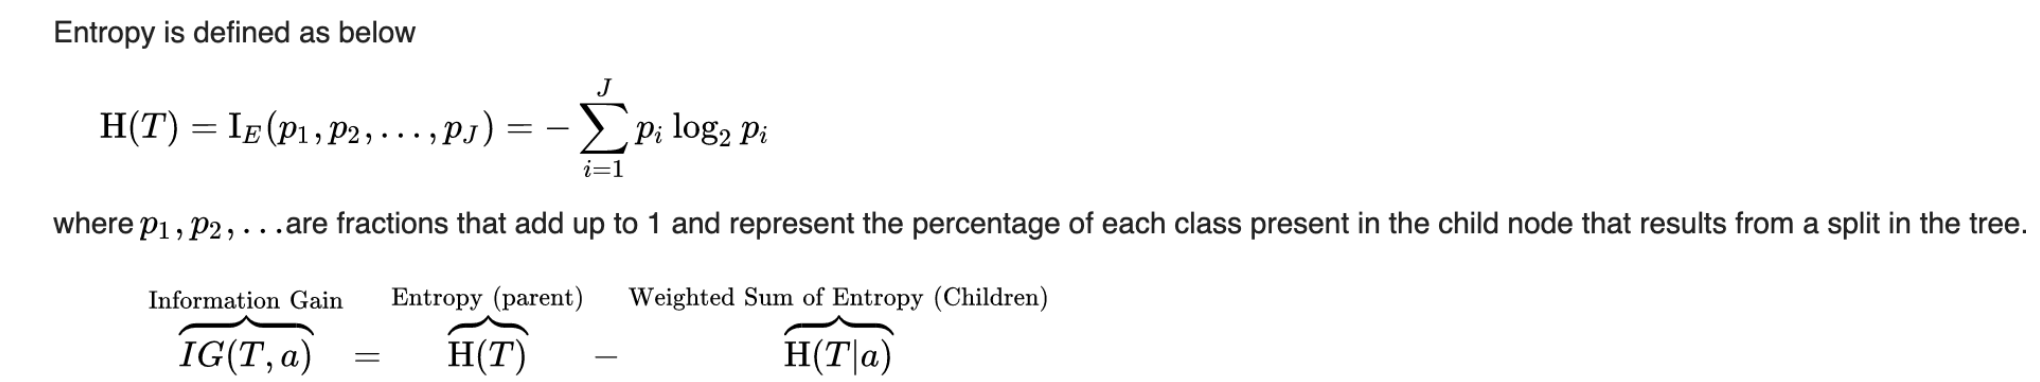

where H(T) is the resulting entropy and H(T|a) is the entropy before the split

**Note** : If the above formula is not displayed, please import the image ('Formula') from the folder. Steps : go to Edit -> Select 'Import Image' option -> select 'Formula' from the folder -> Press Ok -> click on Run

 When using information gain we effectively look to minimize the size of our tree.  The motivation behind this is that the smaller the tree, the faster the classification process.
In this algorithm with each question we separate our data into two disjoint sets that answers our most important question ( or results in the most information gained), which would eventually lead to the fastest qualification. Because we divide into two subsets, most of the calculations are based on log2() as seen in the formula.  


 
 
#### Variance Reduction
 
  Variance Reduction is an algorithm used for continuous target variables (regression problems). In this algorithm, we select the best split (one with lower variance) as the criteria to split the population. The steps to calculate variance are :

   1. Calculate variance for each node
   2. Calculate variance for each split as weighted average of each node variance

Formula for variance is given by:
$$Variance = \frac{X-X^-}{n}$$

**Note** : We are not using this in our project. This is used for regression and predicting continuous data.



### Implementation Strategy
<a id="bgimplementation"></a>

As one may infer from the building strategy, a decision tree is built through recursion, in each instance of recursion we will have to check if our data is completely pure or if we have reached the max depth. If so, we build a leaf node which would classify the instance of the data with the appropriate label. If the data is not pure yet and we have not reached our maximum depth, then we would have to split the data by using one of our metrics. To get the best possible split we would have to get all possible splits then evaluate them based on the metric of choice. In this tutorial we will use the information gain and entropy method with a slight modification. We will minimize the combined entropy for the children nodes, which is equivalent to maximizing information gain. When we make this split, we would have effectively asked another question in our tree, which is the same as creating an interior decision node. Following the creation of this node we would recurse back in our tree to further build the tree.  

An important thing to note is, when we create any leaf node, it completes that branch of our tree. The whole tree  is not complete at that moment , for our tree to complete all our branches would have to end in lead nodes.

This flow of processes is represented with the diagram below :

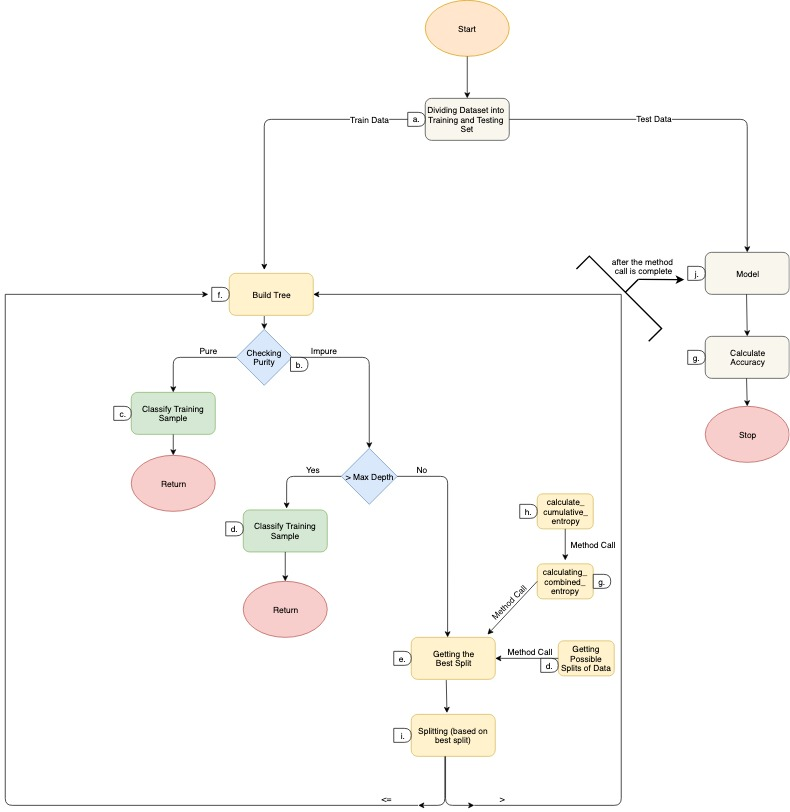

Once we completely build our tree we can use our tree to classify instances in our testing set to measure the accuracy of our implementation.

**Note** : If the image is not getting displayed, go to Edit -> Select 'Import Image' option -> select 'Flow chart' from the folder -> Press Ok -> click on Run


# Main Activity : Making the Tree
<a id="main"></a>

Now that we have outlined a stratergy to build the decision tree, we will implement the various methods that will go into building the tree. Our implementation will make use of the numpy, pandas, random, sklearn, matplot and seaborn libraries.

Here,
<li>numpy is used for operations.</li>
<li>pandas is used for using the dataset as a dataframe.</li>
<li>sklearn is used for importing the iris dataset which is our toy data set</li>
<li>matplotlib and seaborn for plotting the graphs </li>

In [1]:
import numpy as np
import pandas as pd
import random as random
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

### Importing toy data set

Here we are importing toy dataset from the dataset in the sklearn package

In [2]:
iris = datasets.load_iris()

# This step is just to translate the data into a pandas dataframe, which will make it easier for us to understand the dataset
toyData = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

toyData = toyData.rename(columns={"target":"label"})
toyData = toyData.rename(columns={"sepal length (cm)":"sepalLength"})
toyData = toyData.rename(columns={"sepal width (cm)":"sepalWidth"})
toyData = toyData.rename(columns={"petal length (cm)":"petalLength"})
toyData = toyData.rename(columns={"petal width (cm)":"petalWidth"})
toyData.head()


,sepalLength,sepalWidth,petalLength,petalWidth,label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### (A) : Dividing data set into training and testing set 
<a id="dividing"></a>

Here we are dividing our dataset into two sections of train and test data, train data will be used to train our decision tree classifer, while the test dataset will be used to calculate the accuracy of the model.

<li> Here 0.2 mentioned in the code defines that the size of the test dataset will be 20% of total data points</li>

In [3]:
def train_test_split(df):
    idx = df.index.tolist()
    num = 0.2 * len(df) # You can change the constant as per your wish 
    num = int(num)
    testIdx = random.sample(population=idx,k=num) ## Randomly generating indices to put into testing dataset
    testingSet = df.loc[testIdx]
    trainingSet = df.drop(testIdx) #Creating a mutually disjoint training set
    return trainingSet, testingSet

### (B) : Checking purity of the data
<a id="puritycheck"></a>
In this method we check if our data is pure or not.

####  Q1) When is a node completely pure?

##### Solution

<details><summary>Click Here --> </summary>
<p>
The data is called pure when all of the data points have the same label.
For example,a dataset with all labels as 0.0 then it is completely pure.    
    
For a real example, if we have a dataset which can be classified into dogs and cats. If we split the dataset such that, one part contains all the labels as "dog" and the other part has all the labels as "cat", that will give us a pure separation of data.
</p>
</details>

In [4]:
#Run this function before moving ahead
def purity_check(data):
    uniqueLabels = np.unique(data[:,-1]) ## just checks how many unique labels are there in the supplied dataset
    return 1 == len(uniqueLabels)


#### Q2) Will this function return True or False


In [5]:
purity_check(toyData[toyData.label != 0].values)  # we supply only the column of labels, because that is what 
                                                  # we have to consider in order to classify data as pure and impure

False

##### Solution

<details><summary>Click Here --> </summary>
<p>
    
False - because there are 3 different labels in our dataset, therefore even after not considering the 0's, there are still other 2 classes which makes it impure.
    
</p>
</details>

#### Q3) If we have a partition at petal length  = 2.5 cm, is the data on the left side of the partition pure? [Run the code given below]

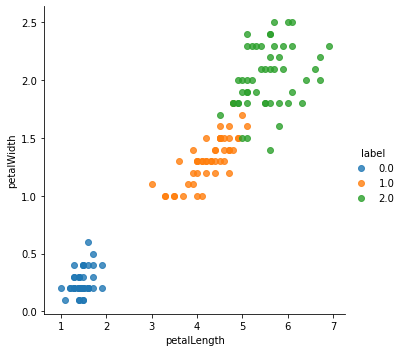

In [6]:
sns.lmplot(data = toyData, x = "petalLength", y = "petalWidth", hue = "label", fit_reg=False,height=5)

##### Solution

<details><summary>Click Here --> </summary>
<p>
Yes, because we have only one class of label on the left of the partition. Purity = 100%
</p>
</details>

### (C) : Classify Training sample
<a id="classifytraining"></a>

This function will be used when we decide to classify the data we have as a particular label. Ideally, when this function is called , the data is completely pure.

In [7]:
def classify_training(data):
    ## Finds the number of occurences of each label in the data
    uniqueLabels , counts = np.unique(data[:,-1], return_counts=True) 
    ## Return the label with the highest count in case of impurity
    return uniqueLabels[counts.argmax()]

### (D) : Getting possible splits of data
<a id="getsplits"></a>
This method is a helper method to determine the best split of data. In this method we return all possible splits of the data. To create all the splits we create a split in the center of neighboring instances of every feature. Later we will determine which one of them is the best. 

In [8]:
## Getting all possible splits
    # Method is given a 2d numpy array and it should result in giving out the splits
    # return a dictionary with splits with respect to per attribute
    # Way of splitting : take every data point and get a split in center of both of them
def get_splits(data):
    #To make a split for every attricute in the dataset
    splits = {}
    _,lenHorizontal = data.shape
    for c in range(lenHorizontal -1):
        splits[c] = []
        vals = np.unique(data[:,c])  
        # getting the midpoint between every two points
        for i in range(len(vals)-1):
            curVal = vals[i]
            nextVal = vals[i+1]
            splits[c].append((nextVal+curVal)/2)
    return splits

### Q4)   If we have a dataset with 5 data points with two features each, how many possible splits will there be ?

##### Solution

<details><summary>Click Here --> </summary>
<p>
There would be 8 total splits. If we split all neighboring data points based on a single feature, we would end up with 4 possible splits. As we have two features, we would have 4 more splits for the second feature.
</p>
</details>

### (E) : Getting the best split
<a id="getbestsplits"></a>

In this section we will determine which is the best possible split based on one of the evaluating algorithms discussed above. For this iris dataset, we have chosen the information gain and entropy minimization method. Recall that we have chosen to represent information gain as entropy minimization because they are equaivalent. 

As information gain is represented by the difference between parent node's information gain and its child node's entropy, therefore if we minimize the child's entropy we would have effectively maximized the information gain for the parent.

### Q5) Complete the line of code for the entropy calculation function

In [9]:
## In this function we are calculating the entropy for a supplied dataset. Using the frequency of its labels.
def calculate_cumilative_entropy(data):
    labels = data[:,-1] ## Getting the labels
    labels, counts = np.unique(data[:,-1], return_counts = True) ## Gets the frequency of all labels
    #Calculating probabilities for each label (Elementwise operation on entire list of labels)
    probs = counts/counts.sum()
    entropies = []
    sumEntropy = 0
    #Now we will compute the cumilative entropy for this data
    for prob in probs:
        val = val = (prob * -np.log2(prob)) #Complete this line, it would use the probability we calculated above and the equation for entropy
        entropies.append(val)
        sumEntropy += val
    return sumEntropy

##### Solution

<details><summary>Click Here --> </summary>
<p>
 val = (prob * -np.log2(prob))
    
#### Insert this line in the code and run it before proceeding
This line calculates the entropy for one label, putting it in the loop above would result in the calculation of cumulative entropy for the data. It comes from the equation in the background section.
</p>
</details>

### Q6) Complete the lines of code to calculate the combined entropy of both sides of the partitioned data

The formula for combined entropy , is of a weighted sum of the cumulative entropies for the datasets we have :
$$ Combined Entropy = \sum_{i=1}^n p(i)E(i) $$

Here :  
        - n = Number of datasets we have  
        - p(i) = probability of getting a datapoint from the ith dataset  
 

In [10]:
# The leftData , rightData are the two datasets that we just split into from the whole dataset. 
# Follow the above formula and make use of the calculate_cumilative_entropy(data) function.
def calculating_combined_entropy(leftData,rightData):
    #  Here we are calculating the total number of points ( Hint : used for probability calculation)
    total = len(leftData) + len(rightData) 
    # Number of points in left / total 
    probLeft = len(leftData)/total # Complete this line of code
    probRight =  len(rightData)/total# Complete this line of code
    combinedEntropy =  (calculate_cumilative_entropy(leftData) * probLeft)+ (calculate_cumilative_entropy(rightData)* probRight)# Complete this line of code
    return combinedEntropy


##### Solution

<details><summary>Click Here --> </summary>
<p>
    
  probLeft = len(leftData)/total    
  probRight = len(rightData)/total  
 combinedEntropy = (calculate_cumilative_entropy(leftData) * probLeft)+  (calculate_cumilative_entropy(rightData)* probRight)  
    
#### Insert this line in the code and run it before proceeding  
This line combined weighted the entropy for both the data points we split into.  
</p>
</details>

In [11]:
## This function actually does the splitting of the data when given the feature to split on and which
# value to split at. Splits the data into two parts based on the point and returns both halves     
def splitting(data,splitFeature,splitValue):
    featureVals = data[:,splitFeature]
    left  = data[featureVals <= splitValue]
    right = data[featureVals> splitValue]
    return left,right

In [12]:
#In this function, given our data and the potential splits calculated before, we look at what split gives us 
# the best split in terms of entropy
# We iterate over all the splits, compute the entropy and return the one with least entropy in this case
def get_best_split(data,possible_splits):
    bestVal = float('inf') 
    for feature in possible_splits:
        for val in possible_splits[feature]:
            left,right = splitting(data,feature,val)
            cur_combined_entropy = calculating_combined_entropy(left,right) ## Calculating the entropies
            if cur_combined_entropy <= bestVal: # Returning the split with least combined entropy
                bestVal = cur_combined_entropy
                split_feature = feature
                split_val = val
    return split_feature,split_val,bestVal

### (F) : Build Tree 
<a id="buildtree"></a>

This is the method that will make use of all the above methods, and build the tree recursively as descibed in the building strategy section. We can treat this as an API, where we pass in features of our data, corresponding labels and a max depth value to reguralize how deep of a tree we build.

We build our decision tree in through nested dictionaries, where each dictionary's key represents a questiono and its values represent its child nodes.

After building the tree we return a tree object, which we will use to classify instances from our training set.



In [13]:
def makeTree(data,labels,maxDepth,depth=0):
    #base case
    if ( purity_check(data) or (len(data) < 2) or depth==maxDepth):
        classification = classify_training(data)
        return classification
    
    #recursion
    else:
        depth+=1
        potential_splits = get_splits(data)##gives u all the splits in the supplied dataset
        splitFeature, splitValue,_ = get_best_split(data,potential_splits)
        left, right = splitting(data, splitFeature, splitValue)
        
        #instantiate example
        splitFeature = labels[int(splitFeature)]
        decision = "%s <= %s"%(splitFeature,splitValue)
        sub_tree = {decision: []}
    
        # to find answers = recurse
        leftTree = makeTree(left,labels,maxDepth, depth)
        rightTree = makeTree(right,labels,maxDepth, depth)
        
        if leftTree == rightTree: 
            sub_tree = leftTree
        else:
            sub_tree[decision].append(leftTree)
            sub_tree[decision].append(rightTree)
        
        return sub_tree

### (G) : Classifying new instances and measuring accuracy
<a id="classifynew"></a>

In this method we will use our trained tree to classify the test data sets that we seperated earlier.

This method is also of a recursive format, we keep recursing down our tree by answering the questions that are asked in our tree till we reach a leaf node.

In the calculateAccuracy method , we use classify instances on our test data set to compute the accuracy of our tree by checking how many of our predicted values are correct.

In [14]:
def classify_instance(instance, decisionTree):
    #Parsing our tree dictionaries
    decNode = list(decisionTree.keys())[0]
    feature,comparison,val = decNode.split(" ")
    val = float(val)
    if comparison == "<=":
        if instance[feature] <= val:
            decision = decisionTree[decNode][0]
        else:
            decision = decisionTree[decNode][1]
    if not isinstance(decision,dict):
        return decision
    else:
        childTree = decision
        return classify_instance(instance,childTree)

In [15]:
def calculateAccuracy(testSet,tree):
    score = 0
    testSet["Predicted"] = testSet.apply(classify_instance,axis=1,args=(tree,))
    for i in range(len(test_df["Predicted"])):
        if (int(test_df["Predicted"].iloc[i])) == int(test_df["label"].iloc[i]) :
            score+=1
    return score/len(test_df["Predicted"])


### Review Questions
<a id="review"></a>

##### Explanation of the 2 methods mentioned below :



As the purpose of the method get_splits is to find all the potential splits on the given data set, it does that by averaging the distance between two neighbour data points.
Here in the following graph we show how all the data points have a split between them and then the best split is selected as per minimum entropy


In [16]:
train_toy, test_toy = train_test_split(toyData) ## generates a random train-test dataset out of the whole dataset, 
                                                ##where the size of test data set is 20

potential_splits_toy = (get_splits(train_toy.values)) ## we divide the data points using the splits,here this method(get_splits) 
                                                      ## finds all the potential splits on the toy data

#### Q1) Run the code below and tell us what function  above will give us the set of all partitions on the given dataset
<a id="rq1"></a>

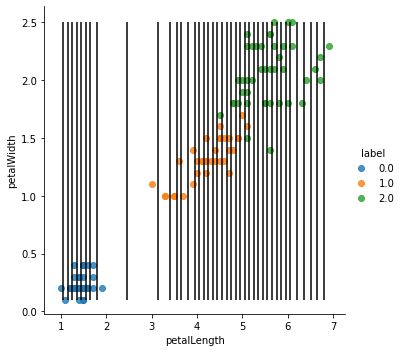

In [17]:
# Vertical Split
sns.lmplot(data=train_toy,x="petalLength",y="petalWidth",hue="label",fit_reg=False,height=5)
plt.vlines(x=potential_splits_toy[2],ymin=0.1,ymax=2.5)

##### Solution

<details><summary>Click Here --></summary>
<p>
Here, the graph depicts the functioning of the get_splits method, and shows how you can have a split between each consecutively neighbouring data points. Thus, this shows us all the possible data splits. 
</p>
</details>

#### Q2) What should be the coordinates of the best split between label 0 and 1?
<a id="rq2"></a>

##### Solution

<details><summary>Click Here --></summary>
<p>
The best vertical split should be around x = 2.4, because that gives us the max margin between the datapoints of label 0 and 1 respectively.
</p>
</details>

#### Q3) Which function would help you get the above result ?
<a id="rq3"></a>

##### Solution

<details><summary>Click Here --></summary>
<p>
get_best_split - this function would give you a result like the above if the data set is isolated for the petal length feature.
</p>
</details>

#### Q4) If we have a split at x = 4, would that be a good split? Explain.
<a id="rq4"></a>

##### Solution

<details><summary>Click Here --></summary>
<p>
    
No, because a split at x = 4, will divide the datapoints with label 1 into two seperate sections, which will hinder the accurate classification of the dataset. Instead, most of the labels on one type should be on one side of the partition.
    
</p>
</details>

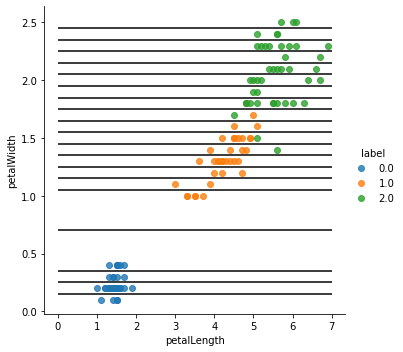

In [18]:
# Horizontal Split
sns.lmplot(data=train_toy,x="petalLength",y="petalWidth",hue="label",fit_reg=False,height=5)
plt.hlines(y=potential_splits_toy[3],xmin=0,xmax=7)

#### Q5) How will we split this data? Horizontally or Vertically or Both?
<a id="rq5"></a>

##### Solution

<details><summary>Click Here --></summary>
<p>
Both.
Just the vertical split does not do a good job of splitting labels 1 and 2, so our decision tree will also consider splits based on petal width to separate labels 1 and 2.
</p>
</details>

#### Q6) What happens after finding the best split of data?
<a id="rq6"></a>

##### Solution

<details><summary>Click Here --></summary>
<p>
After finding the best split, we check if the data on one side of the split is pure or not.
    <p>
    If pure - 
        Then the datapoints on the pure side of the separation are classified with an appropriate label.
    </p>
    <p>
    else-
        We recursively look for another split through each partition, untill we find a pure classification
    </p>
</details>

#### Here we will graphically represent the two sides of partition at x = 2.4 where x represents the petal length.

In [19]:
left,right = splitting(train_toy.values, 2, 2.4)

(0, 7)

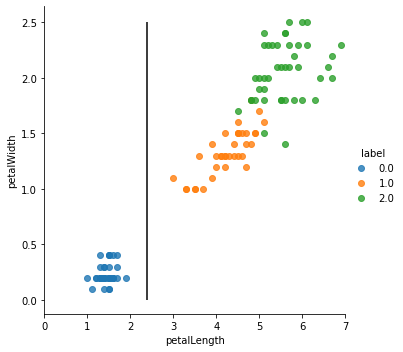

In [20]:
# plotting the whole data frame
sns.lmplot(data=train_toy,x="petalLength",y="petalWidth",hue= "label", fit_reg=False,height=5)
plt.vlines(x=2.4,ymin=0,ymax = 2.5)
plt.xlim(0,7)

(0, 7)

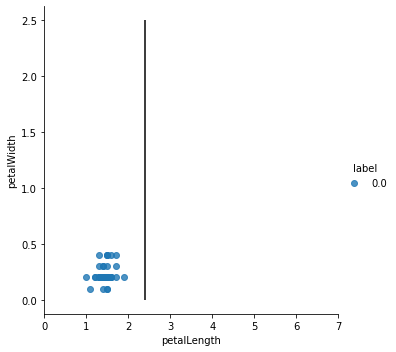

In [21]:
# plotting the data left of the split
leftDataframe = pd.DataFrame(left,columns=train_toy.columns)
sns.lmplot(data = leftDataframe , x="petalLength",y="petalWidth",hue= "label",fit_reg=False,height=5)
plt.vlines(x=2.4,ymin=0,ymax = 2.5)
plt.xlim(0,7)

(0, 7)

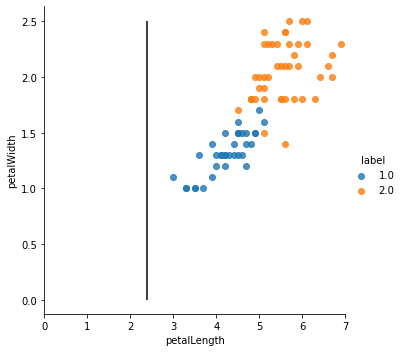

In [22]:
# plotting only the data points right of the split
rightDataframe = pd.DataFrame(right,columns=train_toy.columns)
sns.lmplot(data = rightDataframe , x="petalLength",y="petalWidth",hue= "label",fit_reg=False,height=5)
plt.vlines(x=2.4,ymin=0,ymax = 2.5)
plt.xlim(0,7)

#### Q7) Which side of the above Graph can be considered to be purely classified? Left or Right?
<a id="rq7"></a>

##### Solution
<details><summary>Click Here --></summary>
<p>
Left - Because the left side of the split has only one class of data points or say it has only one type of label i.e 0
</p>
</details>

### Now, we will work on a real-world dataset where we classify patients as diabetic based on their biological metrics
#### Here we are mentioning the calls to the makeTree and calculateAccuracy method.

In [23]:
random.seed(0)
diabetesData = pd.read_csv('diabetes.csv')
diabetesData = diabetesData.rename(columns={"Outcome":"label"})
diabetesData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
train_df, test_df = train_test_split(diabetesData)

#### Q8) How does the graph below compare to the toy dataset? How would vertical splitting compare to the earlier dataset?
<a id="rq8"></a>

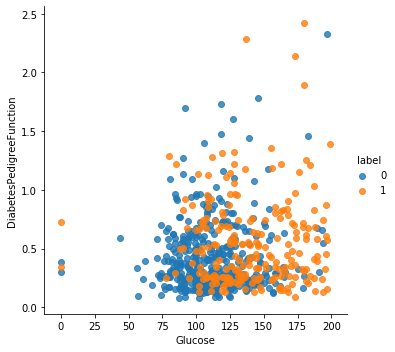

In [25]:
sns.lmplot(data = train_df , x="Glucose",y="DiabetesPedigreeFunction",hue= "label",fit_reg=False,height=5)

##### Solution
<details><summary>Click Here --></summary>
<p>
In this dataset the data is a lot more mixed up,therefore there is no obvious partition for vertical splitting that would yield a good split. This is a problem that is posed to decision trees by most real world datasets.
</p>
</details>

#### Now we are fitting a classifer for the diabetes dataset

In [26]:
# you may set the maxDepth to regularize the depth of the tree
diabetesDecision = makeTree(train_df.values,train_df.columns,maxDepth=3) 
diabetesDecision

{'Glucose <= 127.5': [0.0, {'BMI <= 29.95': [0.0, 1.0]}]}

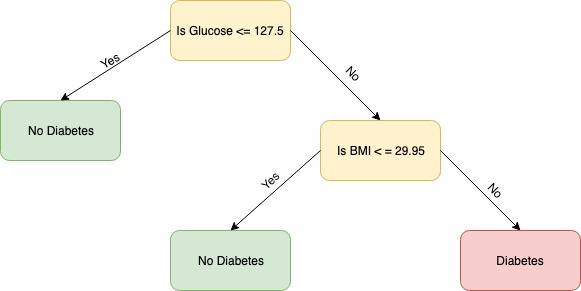

**(Tree for Max Depth = 3)**

**Note** : If the above tree is not displayed, please import the image ('Decision Tree') from the folder. Steps : go to Edit -> Select 'Import Image' option -> select 'Decision Tree' from the folder -> Press Ok -> click on Run


In [27]:
calculateAccuracy(test_df,diabetesDecision)

0.7843137254901961

#### Q9) Write a function to regularize the tree where maxDepth ranges from 1 to 10 and output the maxDepth which maximizes the accuracy.
<a id="rq9"></a>
Note : This might require a few seconds

In [28]:
maxAcc = -1
bestDepth = -1
for i in range(1,10):
#Complete the for loop
    

SyntaxError: unexpected EOF while parsing (<ipython-input-28-9f7a9a466cc4>, line 5)

##### Solution
<details><summary>Click Here --></summary>
<p>

maxAcc = -1

bestDepth = -1

for i in range(1,10):

    tempTree = makeTree(train_df.values,train_df.columns,maxDepth=i)
    
    tempAc = calculateAccuracy(test_df,tempTree)
    
    if tempAc > maxAcc:
    
        bestDepth = i
        
        maxAcc = tempAc
        
        
</p>
</details>

#### Q10) What happens when maxDepth is too large?
<a id="rq10"></a>

<details><summary>Click Here --></summary>
<p>
 This would result in overfitting of the tree.
</details>

 ## References
 <a id="ref"></a>

**Diabetes Dataset from** 'Machine Learning Repository', *UCI*, Link :  https://archive.ics.uci.edu/ml/index.php 

**Dataset Downloaded from** 'Machine Learning in Python, *GitHub*, Link : https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/diabetes.csv

'CS 540 - Introduction to Artificial Intelligence', *University of Wisconsin-Madison* , link : http://pages.cs.wisc.edu/~dyer/cs540.html

Jain R., March 20,2017, *Decision Tree. It begins here.*, Link : https://medium.com/@rishabhjain_22692/decision-trees-it-begins-here-93ff54ef134

'Inofrmation Gain', Link : https://homes.cs.washington.edu/~shapiro/EE596/notes/InfoGain.pdf

In [ ]:
print(abc.shape())

In [ ]:
abc = pd.read_csv('transfusion.csv')
abc = abc.rename(columns={"whether he/she donated blood in March 2007":"label"})
abc.head()

In [ ]:
# you may set the maxDepth to regularize the depth of the tree
tr, te = train_test_split(abc)
decis = makeTree(tr.values,tr.columns,maxDepth=3) 
decis

In [ ]:
calculateAccuracy(te,decis)